In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("/content/WA_Fn_UseC_Telco-Customer-Churn.csv")

df.head()






,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df.shape
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
                     ...   
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Length: 21, dtype: object

In [33]:
#Total Charges is numerical but showing in object
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()
# Replacing Missing Value
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)
df.isnull().sum()

#check for duplicates
len(df[df.duplicated()])
df.drop_duplicates()

"""
for i in df:
 plt.figure(i)
 sns.countplot(data=df,x=i,hue='Churn')
 """



"\nfor i in df:\n plt.figure(i)\n sns.countplot(data=df,x=i,hue='Churn')\n "

In [34]:

#Outliers Removal
def outliers (df , ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)

    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]

    return ls

def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df


index_list = []
for feature in ['tenure','MonthlyCharges','TotalCharges']:
    index_list.extend(outliers(df,feature))

df1 = remove(df,index_list)
df1.shape


(7043, 21)

In [35]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=["Partner","SeniorCitizen","Dependents","OnlineSecurity","OnlineBackup",
 "DeviceProtection","TechSupport","PaperlessBilling","Churn"]
df[col]=df[col].apply(le.fit_transform)
df.head()

#Dropping unimportant columns
drop_list=["customerID","gender","MultipleLines","StreamingTV","StreamingMovies","PhoneService"]
df.drop(drop_list,inplace=True,axis=1)
df.info()

#Creating Dummies
dummies=pd.get_dummies(df[["InternetService","Contract","PaymentMethod"]])
merged=pd.concat([df,dummies],axis='columns')
final=merged.drop(["InternetService","Contract","PaymentMethod"],axis='columns')
df=final
df.info()

pd.set_option("display.max_columns" ,None)
#Splitting into x & y
X=df.drop("Churn",axis=1)
y=df["Churn"]
X.dtypes

pd.set_option("display.max_rows" ,10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   int64  
 6   OnlineBackup      7043 non-null   int64  
 7   DeviceProtection  7043 non-null   int64  
 8   TechSupport       7043 non-null   int64  
 9   Contract          7043 non-null   object 
 10  PaperlessBilling  7043 non-null   int64  
 11  PaymentMethod     7043 non-null   object 
 12  MonthlyCharges    7043 non-null   float64
 13  TotalCharges      7043 non-null   float64
 14  Churn             7043 non-null   int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 825.5+ KB
<class 'pandas.core.frame.Dat

In [38]:
#Applying K best feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_kbest_rank_feature = SelectKBest(score_func = chi2, k = 5)
kbest_feature = select_kbest_rank_feature.fit_transform(X,y)

df_score = pd.DataFrame(select_kbest_rank_feature.scores_,columns = ['Score'])
dfcolumns = pd.DataFrame(X.columns)
kbest_rank_feature_concat = pd.concat([dfcolumns,df_score] , axis = 1)
kbest_rank_feature_concat.columns = ['features','k_score']
kbest_rank_feature_concat

print(kbest_rank_feature_concat.nlargest(10,'k_score'))

df=df.drop(["PaymentMethod_Mailed check","OnlineBackup"],axis=1)
df.info()

X=df.drop('Churn',axis=1)
Y=df["Churn"]
X

                          features        k_score
10                    TotalCharges  627340.305176
3                           tenure   16278.923685
9                   MonthlyCharges    3680.787699
4                   OnlineSecurity     551.611529
7                      TechSupport     523.303866
14         Contract_Month-to-month     519.895311
16               Contract_Two year     488.578090
19  PaymentMethod_Electronic check     426.422767
12     InternetService_Fiber optic     374.476216
13              InternetService_No     286.520193
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   i

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,1,0,1,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1
1,0,0,0,34,2,2,0,0,56.95,1889.50,1,0,0,0,1,0,0,0,0
2,0,0,0,2,2,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0
3,0,0,0,45,2,2,2,0,42.30,1840.75,1,0,0,0,1,0,1,0,0
4,0,0,0,2,0,0,0,1,70.70,151.65,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,2,2,1,84.80,1990.50,1,0,0,0,1,0,0,0,0
7039,0,1,1,72,0,2,0,1,103.20,7362.90,0,1,0,0,1,0,0,1,0
7040,0,1,1,11,2,0,0,1,29.60,346.45,1,0,0,1,0,0,0,0,1
7041,1,1,0,4,0,0,0,1,74.40,306.60,0,1,0,1,0,0,0,0,0


In [39]:

#Data Normalization
from sklearn.preprocessing import MinMaxScaler
MS=MinMaxScaler()
X=MS.fit_transform(X)
X_Scaled = pd.DataFrame(X)

In [40]:
# Check the dependent variable is balanced

Y.value_counts()
# Apply SMOTE for oversampling
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X_Scaled, Y = oversample.fit_resample(X_Scaled, Y)
...
# transform the dataset
oversample = SMOTE()
X_Scaled, Y = oversample.fit_resample(X_Scaled, Y)

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 5174, 1: 5174})


train_accuracy score 0.767775783515118
test_accuracy score 0.764573268921095
Precesion score is  0.75
F1 score is  0.77
 recall  0.79
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1581
           1       0.75      0.79      0.77      1524

    accuracy                           0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105



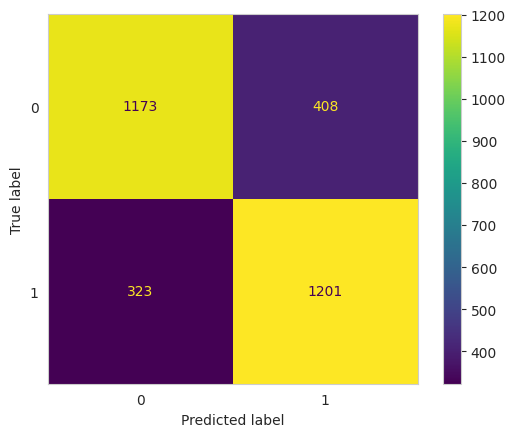

AUC Value 0.8509341604108446
[0.770260941598785, 0.76611901145934, 0.769708684246859, 0.7684661052050256, 0.7663951401353031, 0.7663951401353031, 0.767775783515118, 0.7634957890376916, 0.767775783515118, 0.767775783515118, 0.768604169543007, 0.763633853375673, 0.768051912191081, 0.7699848129228221, 0.767775783515118, 0.7669473974872291, 0.7673615905011736, 0.7692944912329145, 0.767499654839155, 0.770260941598785, 0.7709512632886926, 0.7643241750655806, 0.7637719177136546, 0.7657048184453955, 0.767499654839155, 0.7665332044732845, 0.7703990059367666, 0.765014496755488, 0.767499654839155, 0.768604169543007, 0.7632196603617286, 0.7699848129228221, 0.7703990059367666, 0.7632196603617286, 0.7657048184453955, 0.771089327626674, 0.7647383680795251, 0.7709512632886926, 0.7699848129228221, 0.7617009526439321, 0.7670854618252105, 0.7629435316857656, 0.761977081319895, 0.7623912743338396, 0.7715035206406186, 0.7665332044732845, 0.7690183625569516, 0.7652906254314511, 0.767775783515118, 0.76818997

0.07959878015914201

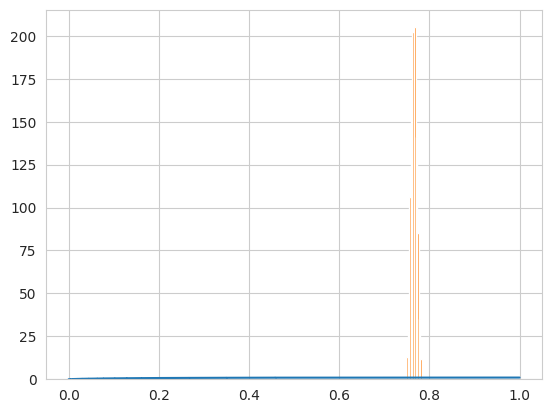

In [41]:

# Model Development
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_Scaled,Y,test_size=0.3,random_state=10)

# perform a logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_train_pred = logreg.predict(X_train)
Y_test_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
Auc_LR = accuracy_score(Y_train , Y_train_pred)
Auc_LR1 = accuracy_score(Y_test , Y_test_pred)

print('train_accuracy score', Auc_LR)
print('test_accuracy score',Auc_LR1)

from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_LR = precision_score(Y_test,Y_test_pred)
f1score_LR = f1_score(Y_test,Y_test_pred)
recall_LR = recall_score(Y_test,Y_test_pred)
print("Precesion score is ",Precesion_LR.round(2))
print("F1 score is ",f1score_LR.round(2))
print(" recall ",recall_LR.round(2))
#check precision,f1-score

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_test_pred))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)
plt.show()

#ROC curve

from sklearn.metrics import roc_curve,roc_auc_score
logreg.predict_proba(X_train)[:1]
TPR,FPR,Dummy = roc_curve(Y_train,logreg.predict_proba(X_train)[:,1])


import matplotlib.pyplot as plt
plt.plot(TPR,FPR)

#AUC Value
print("AUC Value" ,roc_auc_score(Y_train,logreg.predict_log_proba(X_train)[:,1]))



training_accuracy = []
test_accuracy = []

# Validation set approach to get best results that minimise variance
for i in range(1,1001):
    X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled,Y,train_size = 0.7, random_state=i)
    logreg.fit(X_train,Y_train)
    Y_train_pred = logreg.predict(X_train)
    Y_test_pred = logreg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train, Y_train_pred))
    test_accuracy.append(accuracy_score(Y_test, Y_test_pred))

print(training_accuracy)
print(test_accuracy)

import numpy as np
np.mean(training_accuracy)
np.mean(test_accuracy)

K1 = pd.DataFrame(test_accuracy)
K1[0].hist()
K1[0].skew()

Training accuracy : 0.8542040590915366
Test accuracy : 0.7835748792270532
Precesion score is  0.75
F1 score is  0.79
 recall  0.84
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1569
           1       0.75      0.84      0.79      1536

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



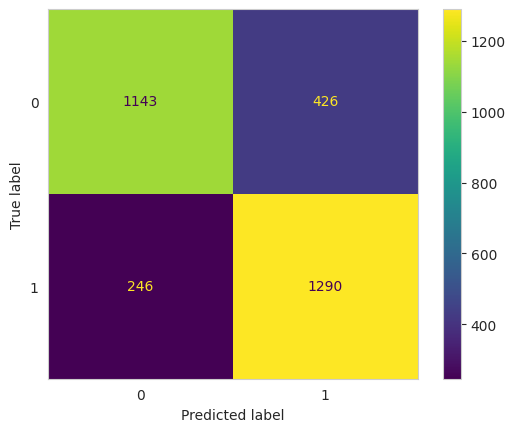

,0,0,0
0,1,1.00,0.80
1,3,0.89,0.78
2,5,0.85,0.78
3,7,0.83,0.78
4,9,0.82,0.77
5,11,0.81,0.77
6,13,0.81,0.77
7,15,0.80,0.77
8,17,0.80,0.77
9,19,0.79,0.77


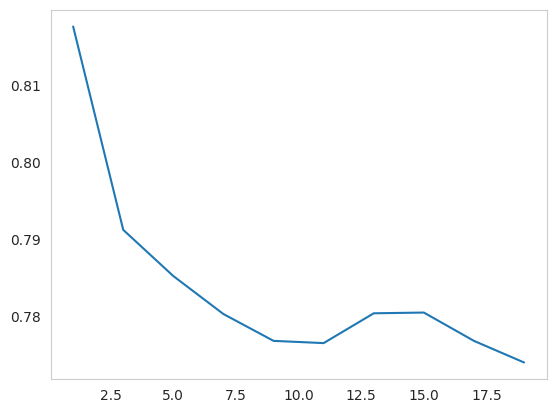

In [42]:
# performing Knn algorithm
pd.set_option("display.max_columns", None)

from sklearn.neighbors import KNeighborsClassifier
KNN =   KNeighborsClassifier(n_neighbors = 5 , p = 1)
KNN.fit(X_train  , Y_train)
Y_Pred_train = KNN.predict(X_train)
Y_Pred_test = KNN.predict(X_test)

from sklearn.metrics import accuracy_score
train_accu_KNN = accuracy_score(Y_train , Y_Pred_train)
test_accu_KNN = accuracy_score(Y_test , Y_Pred_test)

print("Training accuracy :" ,train_accu_KNN)
print("Test accuracy :", test_accu_KNN)


from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_KNN = precision_score(Y_test,Y_Pred_test)
f1score_KNN = f1_score(Y_test,Y_Pred_test)
recall_KNN = recall_score(Y_test,Y_Pred_test)
print("Precesion score is ",Precesion_KNN.round(2))
print("F1 score is ",f1score_KNN.round(2))
print(" recall ",recall_KNN.round(2))





from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_Pred_test))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_Pred_test)
plt.show()



training_accuracy = []
test_accuracy  = []
K_scores=[]
from sklearn.model_selection import cross_val_score

for i in range (1,21,2):
    from sklearn.neighbors import KNeighborsClassifier
    KNN =   KNeighborsClassifier(n_neighbors = i , p = 2)
    KNN.fit(X_train  , Y_train)
    Y_Pred_train = KNN.predict(X_train)
    Y_Pred_test = KNN.predict(X_test)
    scores = cross_val_score(KNN, X_Scaled, Y, cv=5, scoring='accuracy')
    K_scores.append(scores.mean())
    from sklearn.metrics import accuracy_score
    training_accuracy.append(accuracy_score(Y_train , Y_Pred_train).round(2))
    test_accuracy.append(accuracy_score(Y_test , Y_Pred_test).round(2))

import matplotlib.pyplot as plt
plt.plot(range(1,21,2),K_scores)



pd.DataFrame(range(1,21,2))
pd.DataFrame(training_accuracy)
pd.DataFrame(test_accuracy)

pd.concat([pd.DataFrame(range(1,21,2)),
           pd.DataFrame(training_accuracy),
           pd.DataFrame(test_accuracy)],axis =1)

training_accuracy 0.7937318790556399
test_accuracy 0.7677938808373591
Precesion score is  0.75
F1 score is  0.77
 recall  0.79
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1569
           1       0.75      0.79      0.77      1536

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



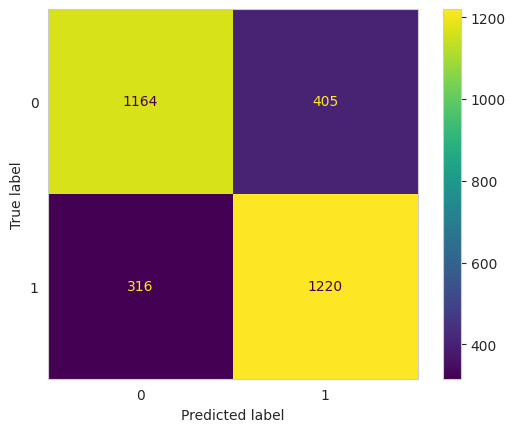

113

In [43]:
# Using Decision trees

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="gini", max_depth = 6)
DT.fit(X_train,Y_train)
df.dtypes

Y_train_pred = DT.predict(X_train)

Y_test_pred = DT.predict(X_test)

from sklearn.metrics import accuracy_score
AUC_DT = accuracy_score(Y_train, Y_train_pred)
AUC_DT1= accuracy_score(Y_test, Y_test_pred)
print('training_accuracy', AUC_DT)
print('test_accuracy',AUC_DT1)


from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_DT = precision_score(Y_test,Y_test_pred)
f1score_DT = f1_score(Y_test,Y_test_pred)
recall_DT = recall_score(Y_test,Y_test_pred)
print("Precesion score is ",Precesion_DT.round(2))
print("F1 score is ",f1score_DT.round(2))
print(" recall ",recall_DT.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_test_pred))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_test_pred)
plt.show()

DT.tree_.max_depth #calculating depth of the tree
DT.tree_.node_count  # calcuating the numbervo

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy score 0.797045423167196
test accuracy 0.7813204508856683
Precesion score is  0.75
F1 score is  0.79
 recall  0.83
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1569
           1       0.75      0.83      0.79      1536

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



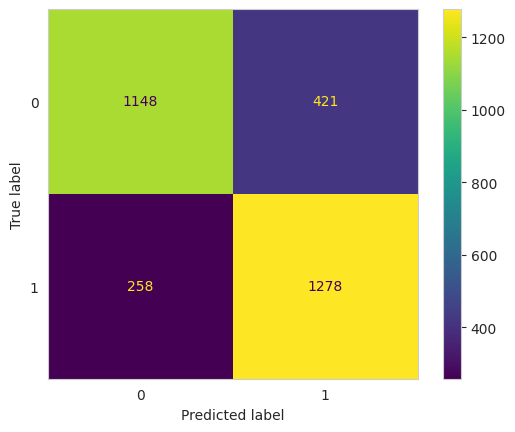

In [44]:

# Bagging
from sklearn.ensemble import BaggingClassifier
DT = DecisionTreeClassifier(max_depth=5)
bag = BaggingClassifier(base_estimator=DT ,max_features=0.5,
                  n_estimators=500,
                  max_samples=0.8,
                  bootstrap= True) #bootstrap means no repeating samples

bag.fit(X_train,Y_train)

Y_pred_tr = bag.predict(X_train)
Y_pred_te = bag.predict(X_test)
from sklearn.metrics import accuracy_score
bag_AC = accuracy_score(Y_train, Y_pred_tr)
print("Accuracy score"  , bag_AC)

bag_AC1 = accuracy_score(Y_test, Y_pred_te)
print("test accuracy" , bag_AC1)

from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_BG = precision_score(Y_test,Y_pred_te)
f1score_BG = f1_score(Y_test,Y_pred_te)
recall_BG = recall_score(Y_test,Y_pred_te)
print("Precesion score is ",Precesion_BG.round(2))
print("F1 score is ",f1score_BG.round(2))
print(" recall ",recall_BG.round(2))



from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pred_te))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_te)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


train accuracy score 0.8013254176446224
test accuracy 0.7816425120772947
Precesion score is  0.75
F1 score is  0.79
 recall  0.83
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1569
           1       0.75      0.83      0.79      1536

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



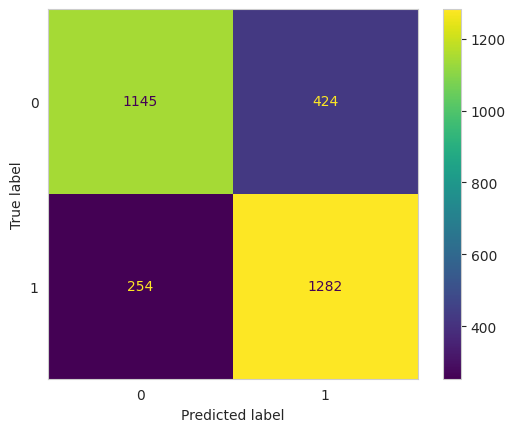

In [45]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
RFR = RandomForestClassifier(max_depth=6,
                  n_estimators=500,
                  max_samples=None,max_features='auto',
                  bootstrap= False,random_state=100) #bootstrap means no repeating samples

RFR.fit(X_train,Y_train)

Y_pred_train = RFR.predict(X_train)
Y_pred_tes = RFR.predict(X_test)
from sklearn.metrics import accuracy_score
RFR_acc = accuracy_score(Y_train, Y_pred_train)
print("train accuracy score"  ,RFR_acc )

RFR_ACC1 = accuracy_score(Y_test, Y_pred_tes)
print("test accuracy" ,RFR_ACC1)


from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_RFR = precision_score(Y_test,Y_pred_tes)
f1score_RFR = f1_score(Y_test,Y_pred_tes)
recall_RFR = recall_score(Y_test,Y_pred_tes)
print("Precesion score is ",Precesion_RFR.round(2))
print("F1 score is ",f1score_RFR.round(2))
print(" recall ",recall_RFR.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pred_tes))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_tes)
plt.show()


Training Accuracy 0.7917989783238989
Test Accuracy 0.7864734299516908
Precesion score is  0.75
F1 score is  0.8
 recall  0.85
              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1569
           1       0.75      0.85      0.80      1536

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



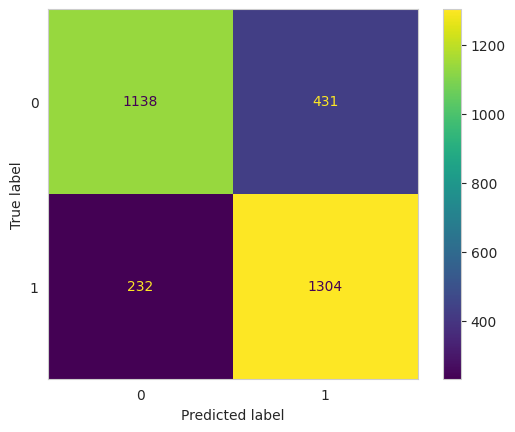

In [46]:





# Boosting
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier()
ADB.fit(X_train, Y_train)

Y_pred_train = ADB.predict(X_train)
Y_pred_test = ADB.predict(X_test)



Auc_ADB = accuracy_score(Y_train, Y_pred_train)
Auc_ADB1 = accuracy_score(Y_test, Y_pred_test)

print("Training Accuracy" , Auc_ADB )
print("Test Accuracy" , Auc_ADB1 )

from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_ADB = precision_score(Y_test,Y_pred_test)
f1score_ADB = f1_score(Y_test,Y_pred_test)
recall_ADB = recall_score(Y_test,Y_pred_test)
print("Precesion score is ",Precesion_ADB.round(2))
print("F1 score is ",f1score_ADB.round(2))
print(" recall ",recall_ADB.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pred_test))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_test)
plt.show()

Train_accuracy_score 0.7587939698492462
Test_accuracy_score 0.7587939698492462
Precesion score is  0.74
F1 score is  0.77
 recall  0.8
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1298
           1       0.74      0.80      0.77      1289

    accuracy                           0.76      2587
   macro avg       0.76      0.76      0.76      2587
weighted avg       0.76      0.76      0.76      2587



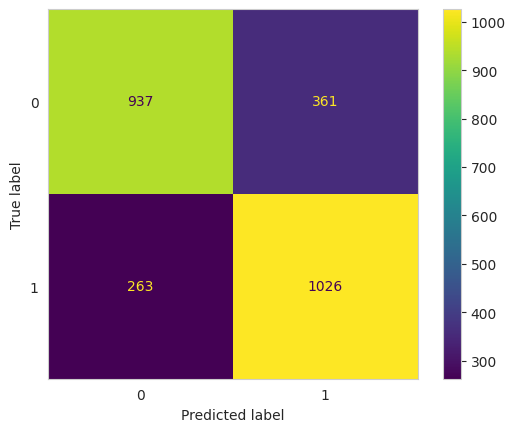

In [47]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_Scaled,Y)

# model fi1tting

from sklearn.naive_bayes import MultinomialNB
Multi = MultinomialNB()
Multi.fit(X_train,Y_train)

Y_pre_train = Multi.predict(X_train)
Y_pre_test = Multi.predict(X_test)


from sklearn.metrics import accuracy_score
Train_acc_score_naive = accuracy_score(Y_train, Y_pre_train)
Test_acc_score_naive = accuracy_score(Y_test, Y_pre_test)

print('Train_accuracy_score', Train_acc_score_naive)
print('Test_accuracy_score' , Test_acc_score_naive)

from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_naive = precision_score(Y_test,Y_pre_test)
f1score_naive = f1_score(Y_test,Y_pre_test)
recall_naive = recall_score(Y_test,Y_pre_test)
print("Precesion score is ",Precesion_naive.round(2))
print("F1 score is ",f1score_naive.round(2))
print(" recall ",recall_naive.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pre_test))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pre_test)
plt.show()

Training Accuracy 0.9333848730833656
Test Accuracy 0.8341708542713567
Precesion score is  0.82
F1 score is  0.84
 recall  0.85
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1298
           1       0.82      0.85      0.84      1289

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587



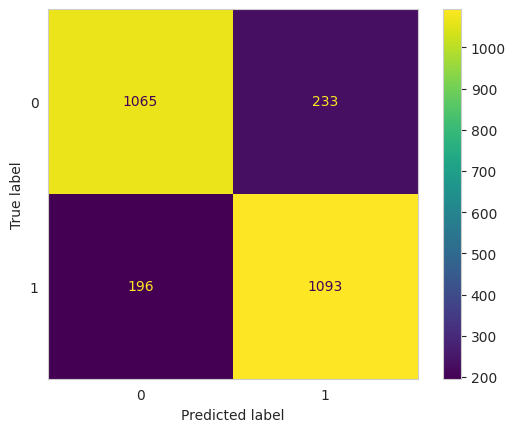

,Test Accuracy,F1 Score,Precision,Recall
Model Name,,,,
Logistic Regression,0.764573,0.766677,0.746426,0.788058
Decision Tree,0.767794,0.771908,0.750769,0.794271
Random Forest,0.781643,0.790870,0.751465,0.834635
KNN,0.783575,0.793358,0.751748,0.839844
naive,0.783575,0.766816,0.739726,0.795966
Bagging,0.781320,0.790108,0.752207,0.832031
AdaBoost Classifier,0.786473,0.797310,0.751585,0.848958
XGBoost Classfier,0.834171,0.835946,0.824284,0.847944


In [48]:


#XGboost

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, Y_train)
xg = XGBClassifier()
xg.fit(X_train, Y_train)
Y_pred_train_ = xg.predict(X_train)
Y_pred_test_ = xg.predict(X_test)



Auc_XG = accuracy_score(Y_train, Y_pred_train_)
Auc_XG1 = accuracy_score(Y_test, Y_pred_test_)

print("Training Accuracy" , Auc_XG )
print("Test Accuracy" , Auc_XG1 )


from sklearn.metrics import precision_score, f1_score , recall_score
Precesion_XG = precision_score(Y_test,Y_pred_test_)
f1score_XG = f1_score(Y_test,Y_pred_test_)
recall_XG = recall_score(Y_test,Y_pred_test_)
print("Precesion score is ",Precesion_XG.round(2))
print("F1 score is ",f1score_XG.round(2))
print(" recall ",recall_XG.round(2))


from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(Y_test, Y_pred_test_))

sns.set_style("whitegrid", {'axes.grid' : False})

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred_test_)
plt.show()

#====================================================================
#Making a dataframe of all the scores for every model
scores = [("Logistic Regression",Auc_LR1, f1score_LR,Precesion_LR,recall_LR),
           ("Decision Tree",AUC_DT1,f1score_DT,Precesion_DT,recall_DT),
           ("Random Forest",RFR_ACC1, f1score_RFR,Precesion_RFR,recall_RFR),
           ("KNN", test_accu_KNN, f1score_KNN,Precesion_KNN,recall_KNN),
           ("naive", test_accu_KNN, f1score_naive,Precesion_naive,recall_naive),
           ('Bagging',bag_AC1, f1score_BG,Precesion_BG,recall_BG),
           ('AdaBoost Classifier',Auc_ADB1, f1score_ADB,Precesion_ADB,recall_ADB),
           ('XGBoost Classfier',Auc_XG1, f1score_XG,Precesion_XG,recall_XG)]

Scores =pd.DataFrame(data = scores, columns=['Model Name','Test Accuracy','F1 Score', 'Precision', 'Recall'])
Scores.set_index('Model Name', inplace = True)
Scores.style.background_gradient(cmap='YlGn')
Scores

# CONCLUSION XG BOOST giving best results